In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

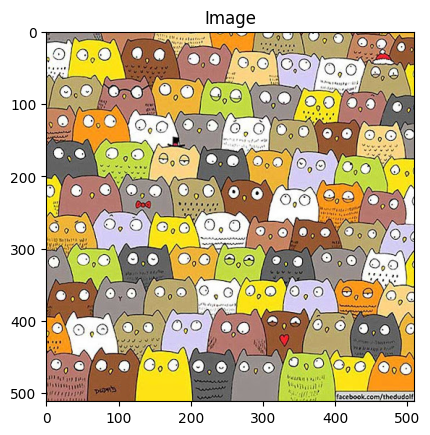

In [33]:
image_path = 'cat.jpg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.show()

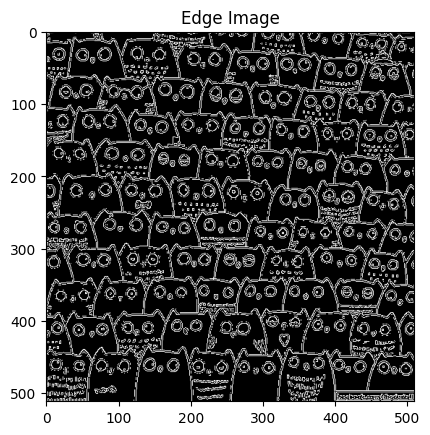

In [34]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges_image = cv2.Canny(gray_image, 100, 200)      
plt.imshow(cv2.cvtColor(edges_image, cv2.COLOR_BGR2RGB))
plt.title('Edge Image')
plt.show()


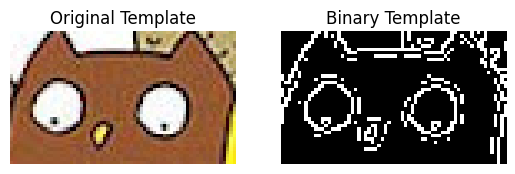

In [44]:
x, y, w, h = 62, 440, 68, 40

template = image[y:y+h, x:x+w]

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.title('Original Template')
plt.axis('off')

gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
edges_template = cv2.Canny(gray_template, 100, 200) 

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(edges_template, cv2.COLOR_BGR2RGB))
plt.title('Binary Template')
plt.axis('off')
plt.show()

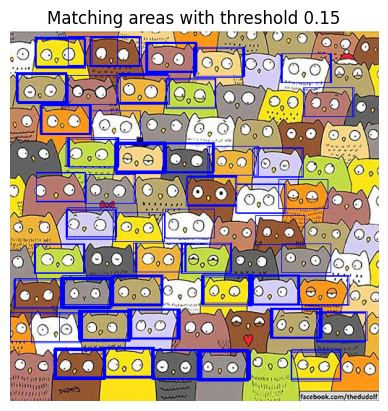

In [54]:
image = cv2.imread(image_path)
result = cv2.matchTemplate(edges_image, edges_template, cv2.TM_CCOEFF_NORMED)


threshold = 0.15
loc = np.where(result >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + int(w ), pt[1] + int(h)), (255, 0 , 0), 1)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title(f'Matching areas with threshold {threshold}')
plt.axis('off')
plt.show()
